# Plan Of Action 
1. First i wll use `sklearn standization`.
2. I wll make my own class

# Load Libraries

In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("insurance_data.csv",usecols=['age','bmi','bloodpressure','claim'])
data.head(2)

,age,bmi,bloodpressure,claim
0,39.0,23.2,91,1121.87
1,24.0,30.1,87,1131.51


# Check the mean and std

In [4]:
data.describe()

,age,bmi,bloodpressure,claim
count,1335.000000,1340.000000,1340.000000,1340.000000
mean,38.078652,30.668955,94.157463,13252.745642
std,11.102924,6.106735,11.434712,12109.609288
min,18.000000,16.000000,80.000000,1121.870000
25%,29.000000,26.275000,86.000000,4719.685000
50%,38.000000,30.400000,92.000000,9369.615000
75%,47.000000,34.700000,99.000000,16604.305000
max,60.000000,53.100000,140.000000,63770.430000


# Conclussion
1. See that mean should greater then 0 and std also greater then 0.

# Apply Standization

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns='claim'),data['claim'],test_size=0.2,random_state=43)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scale=StandardScaler()
scale_s_train=scale.fit_transform(x_train)
scale_x_test=scale.transform(x_test)

# Now see the result

In [11]:
scale_df=pd.DataFrame(scale_s_train,columns=x_train.columns)
scale_df

,age,bmi,bloodpressure
0,-0.097012,-0.001642,0.172731
1,-1.793925,-0.653732,0.084849
2,-0.811502,0.797167,0.348495
3,0.528167,-0.246176,3.951657
4,-0.990124,0.894981,0.875787
...,...,...,...
1067,0.706789,-0.213571,-1.233381
1068,-0.275634,0.568936,-0.354561
1069,1.064034,-0.099456,-0.530325
1070,-1.079435,0.145078,0.084849


In [12]:
scale_df.describe()

,age,bmi,bloodpressure
count,1.067000e+03,1.072000e+03,1.072000e+03
mean,-8.657034e-17,4.308328e-17,2.916407e-16
std,1.000469e+00,1.000467e+00,1.000467e+00
min,-1.793925e+00,-2.381769e+00,-1.233381e+00
25%,-8.115016e-01,-7.189407e-01,-7.060893e-01
50%,-7.700686e-03,-5.054909e-02,-1.787973e-01
75%,7.961002e-01,6.667492e-01,4.363768e-01
max,1.957146e+00,3.666360e+00,4.039539e+00


# Conclussion
1. See that mean sould close to 0 and std should be 1

# Custom Class

# Std Formula
1. `new_x = (x - x.mean()) / std(x)`

In [13]:
class my_standzation:
    def __init__(self):
        self.mean=None
        self.std=None
        
    def fit(self,x_train):
        self.mean=np.mean(x_train)
        self.std=np.std(x_train)
    
    def transform(self,x_train):
        if(self.mean is not None and self.std is not None):
            return (x_train-self.mean)/(self.std)
        else:
            raise ValueError("Mean and std is None")
    
    def fit_transform(self,x_train):
        
        self.fit(x_train)
        
        return self.transform(x_train)

# Make the Obj of `Custom Class`

In [17]:
s=my_standzation()
custom_x_train_scale=s.fit_transform(x_train)
custom_x_test_scale=s.transform(x_test)

In [20]:
scale_df2=pd.DataFrame(custom_x_train_scale,columns=x_train.columns)

# Compare the result of `sklearn` and `custom` class

In [21]:
scale_df.head()

,age,bmi,bloodpressure
0,-0.097012,-0.001642,0.172731
1,-1.793925,-0.653732,0.084849
2,-0.811502,0.797167,0.348495
3,0.528167,-0.246176,3.951657
4,-0.990124,0.894981,0.875787


In [22]:
scale_df2.head()

,age,bmi,bloodpressure
144,-1.542294,-3.858537,3.667425
564,-3.239207,-4.510627,3.579543
1300,-2.256784,-3.059728,3.843189
1174,-0.917116,-4.103071,7.446351
717,-2.435406,-2.961915,4.370481


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: title={'center': 'After Scaling'}, xlabel='age', ylabel='bmi'>

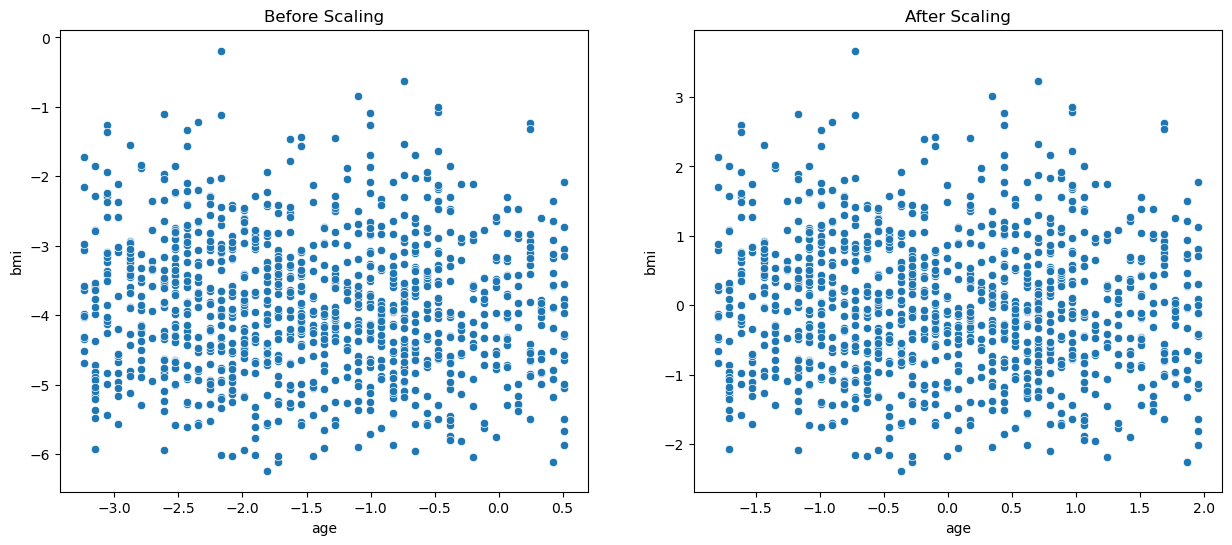

In [25]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
ax1.set_title("Before Scaling")
sns.scatterplot(x=scale_df2['age'],y=scale_df2['bmi'],ax=ax1)

ax2.set_title("After Scaling")
sns.scatterplot(x=scale_df['age'],y=scale_df['bmi'],ax=ax2)

# Conclussion
1. We see that result should be same but the scale should be different